# Prediction using Decision Tree Algorithm

## Author - Nikhil Kumar

## Importing relevant libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Iris dataset

In [30]:
iris_df=pd.read_csv('Iris.csv')
print("Data is imported")

Data is imported


## printing the data

In [31]:
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Checking for the null values

In [5]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Since there is no null values in the dataset and also it is visible that data is not categorical
rather numeric hence any operations will not have any problem.

## Checking the information about attributes

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Checking the distribution of the attributes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

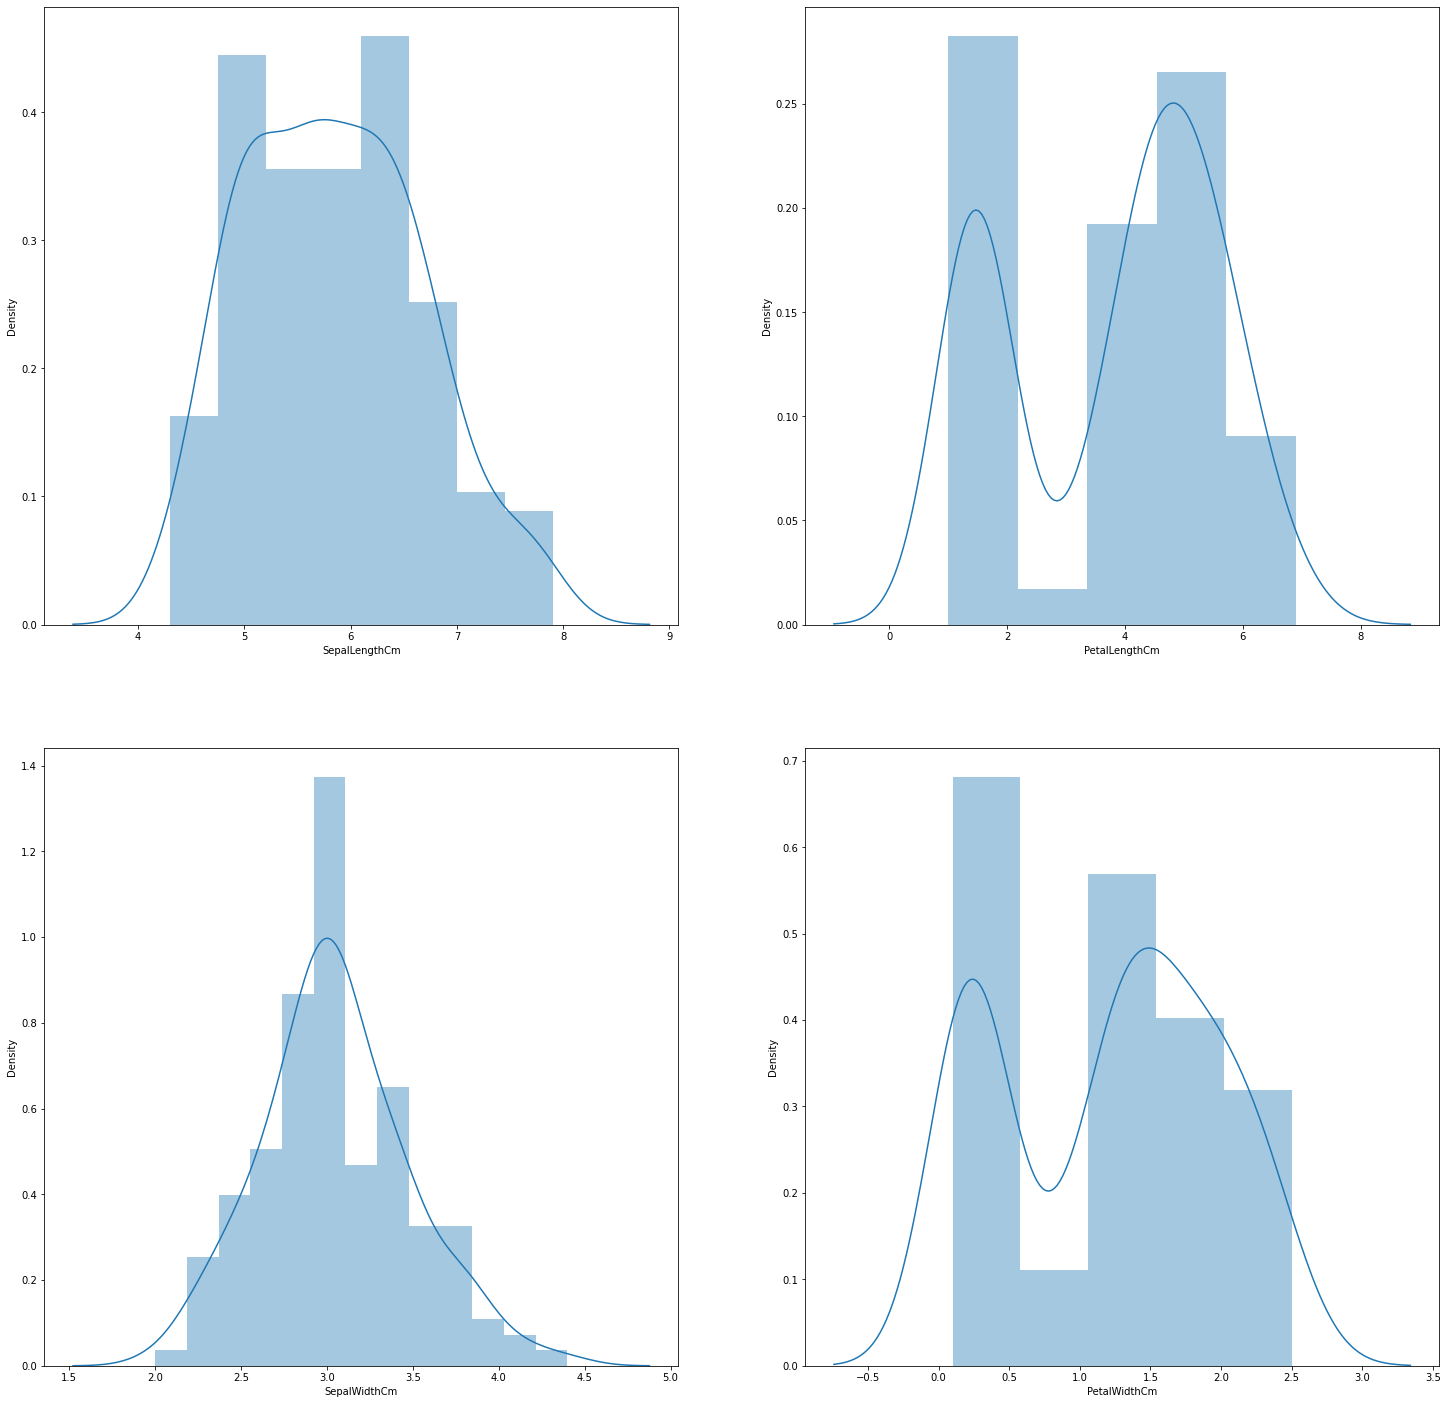

In [7]:
f,axes=plt.subplots(2,2,figsize=(25,25))
sns.distplot(iris_df.SepalLengthCm,ax=axes[0,0])
sns.distplot(iris_df.PetalLengthCm,ax=axes[0,1])
sns.distplot(iris_df.SepalWidthCm,ax=axes[1,0])
sns.distplot(iris_df.PetalWidthCm,ax=axes[1,1])

## Since all the attributes are asymptotically normally distributed , hence they can be used as explaining/independent variables

## Checking the relationship between attributes using correlation

In [8]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Here we see that the correlation between petal length and petal width is 0.9627
which is very high which can also be verified from heat map.

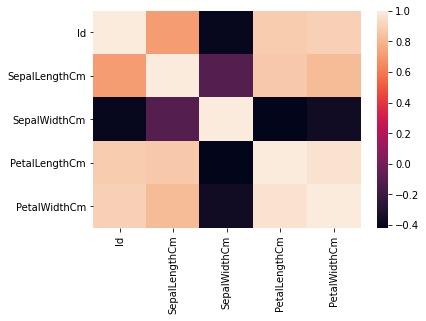

In [9]:
sns.heatmap(iris_df.corr())

Here from heatmap we see that light coloured boxes show high correlation
and we see high correlation in Petal Length and Petal width , so we can use any one of them variables in our further analysis.

## Dropping the Petal width from the Data Frame

In [32]:
iris_df.drop(["PetalWidthCm"], axis=1,inplace=True)

Target Dataset

In [33]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa


## Defining the target dataset

In [15]:
y=iris_df.Species
x=iris_df.drop(["Species","Id"],axis=1)
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], dtype='object')

## checking the uniformity of the dependent variable

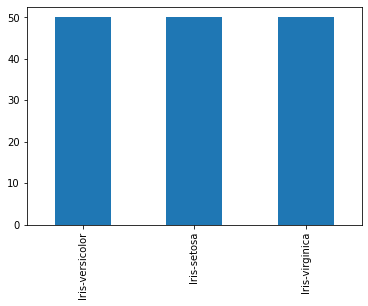

In [16]:
y.value_counts().plot.bar()

## Splitting the data into trainning and test dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

## Importing the Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

## Fitting the Decision tree model

In [19]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predicting the data

In [20]:
y_pred=model.predict(X_test)

## Checking the accuracy of the model

In [21]:
from sklearn import metrics

In [22]:
acc=metrics.accuracy_score(y_test,y_pred)
print(acc)

0.9666666666666667


## Here we see that the accuracy score is 96.67% ,which shows that this is a good model.

## Installing and importing libraries for graphic visualization.

In [23]:
pip install pydotplus

In [24]:
pip install graphviz

In [26]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

## Visualizing the Decision Tree

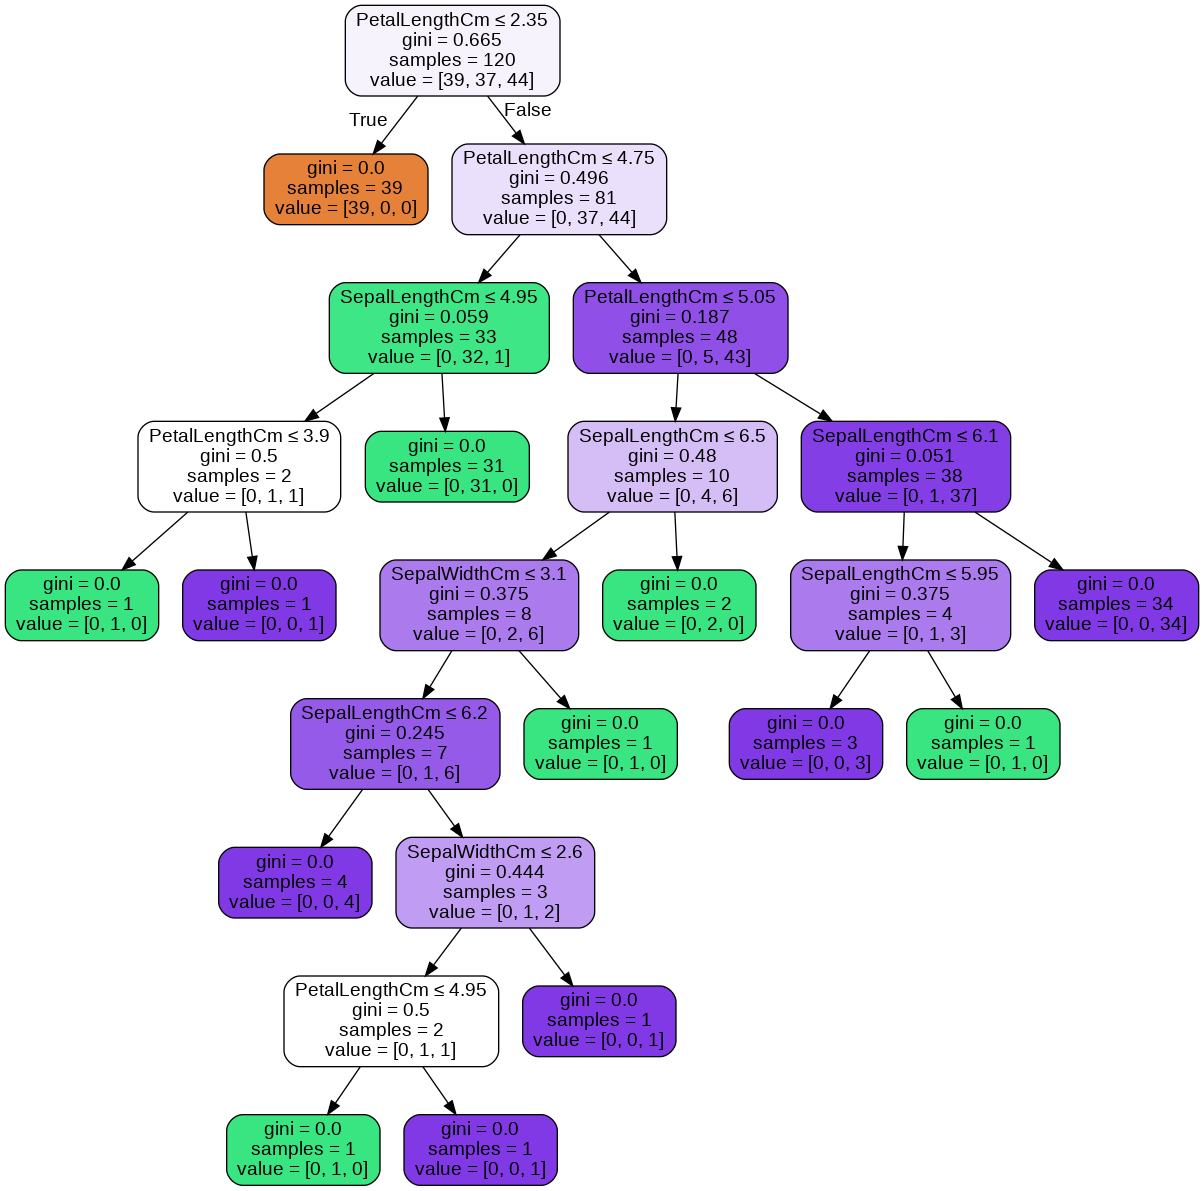

In [27]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())